Image dimensions: torch.Size([100, 100])
Value range: 21.0 to 255.0

Small 6x6 section from upper sky:
tensor([[231, 231, 230, 227, 225, 225],
        [229, 232, 226, 229, 226, 229],
        [224, 231, 232, 231, 232, 231],
        [223, 223, 233, 238, 233, 237],
        [223, 226, 232, 238, 235, 237],
        [225, 226, 232, 235, 236, 233]], dtype=torch.int32)


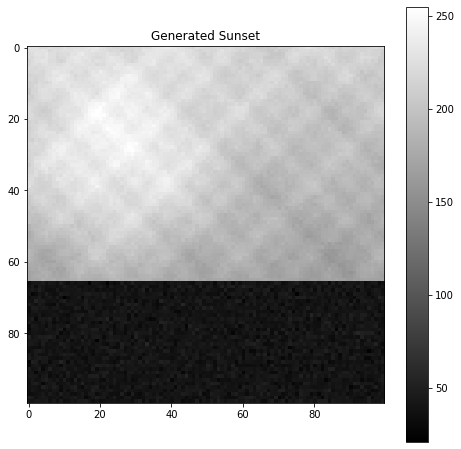

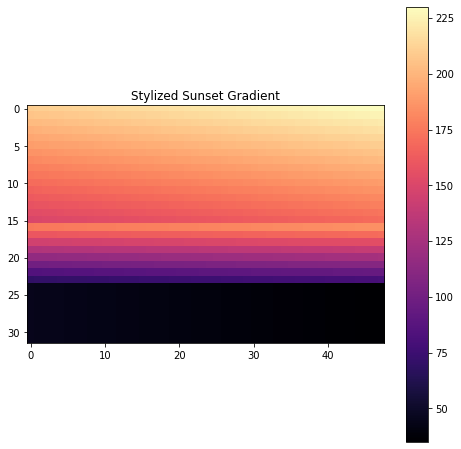

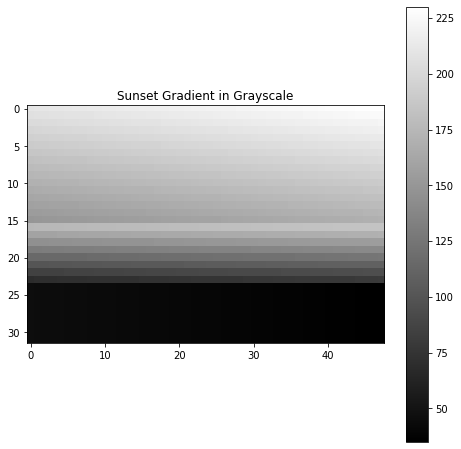

In [13]:
# Create an artistic sunset gradient
import torch
import numpy as np

def create_sunset(height=32, width=48):
    """Generate a stylized sunset with distinct zones."""
    sunset = torch.zeros((height, width))
    
    # Sky gradient - bright to orange
    for i in range(height//2):
        base = 220 - (i * 4)  # Gradual darkening
        variation = torch.linspace(-10, 10, width)
        sunset[i, :] = base + variation
    
    # Transition zone - orange to purple
    mid = height//2
    for i in range(mid, mid + height//4):
        base = 180 - ((i-mid) * 15)
        variation = torch.linspace(-5, 5, width)
        sunset[i, :] = base + variation
    
    # Ground - dark
    sunset[mid + height//4:, :] = torch.linspace(45, 35, width).repeat(height - (mid + height//4), 1)
    
    return sunset

# Generate and display our sunset
sunset = create_sunset()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(sunset, cmap='magma')
plt.colorbar()
plt.title("Stylized Sunset Gradient")
plt.show()

# Also display in grayscale
plt.figure(figsize=(8, 8))
plt.imshow(sunset, cmap='gray')
plt.colorbar()
plt.title("Sunset Gradient in Grayscale") 
plt.show()

